## Assignment 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.
3. Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.



#### Steps/Approach:

 1. Data Preperation
 2. Data cleansing 
 
      . Missing_data percantage....
      
      . Retain data beyond threshold of missing values
      
      . Impute missing data with default or mean based on dtype
      
 3. EDA
 
      . Univariate analysis
      
      . Bi-variate analysis
      
      . Visualise distribution 
      
      
 4. Outlier treatment 
 
 5. Model building
 
 6. Model evalution
 
 7. Conclusion/recommendation

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
#Importing matplotlib
import matplotlib.pyplot as plt
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Skew is: 1.8828757597682129


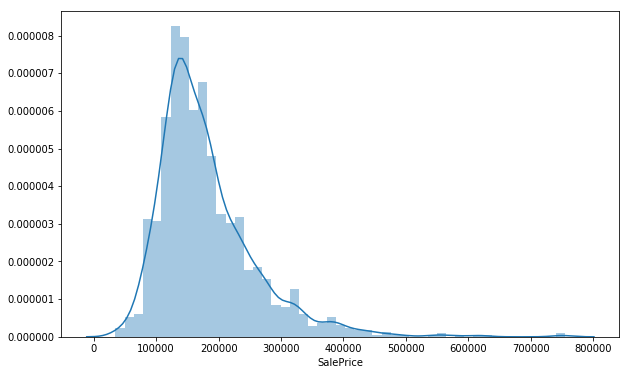

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df.SalePrice)
print ("Skew is:", df.SalePrice.skew())
plt.show()

The target data is skwed to right side , so lets normalise it using log function 

Skew is: 0.12133506220520406


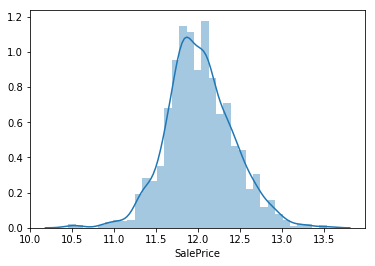

In [8]:
target = np.log(df.SalePrice)
sns.distplot(target)
print("Skew is:", target.skew())
plt.show()

In [9]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

In [10]:
# Checking the percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [11]:
# Removing the columns having highest missing values ( more than 10%)
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) >10]
print(missing_columns)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [12]:
#Dropping the missing columns , and 
df = df.drop(missing_columns, axis=1)
df = df.drop('Id',axis='columns')
print(df.shape)

(1460, 74)


In [13]:
# Removing the columns having highest missing values ( more than 10%)
imputing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) >0.00]
print(imputing_columns)

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


In [14]:
#Imputing categorical variable with NA
cat = []
for i in df.columns:
    if df[i].dtype == object:
        cat.append(i)
df.update(df[cat].fillna('NA'))

In [15]:
#Imputing Numerical variable with there mean value
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = []
for i in df.columns:
    if df[i].dtype in numerics:
        num.append(i)
df.update(df[num].fillna(df.mode()))

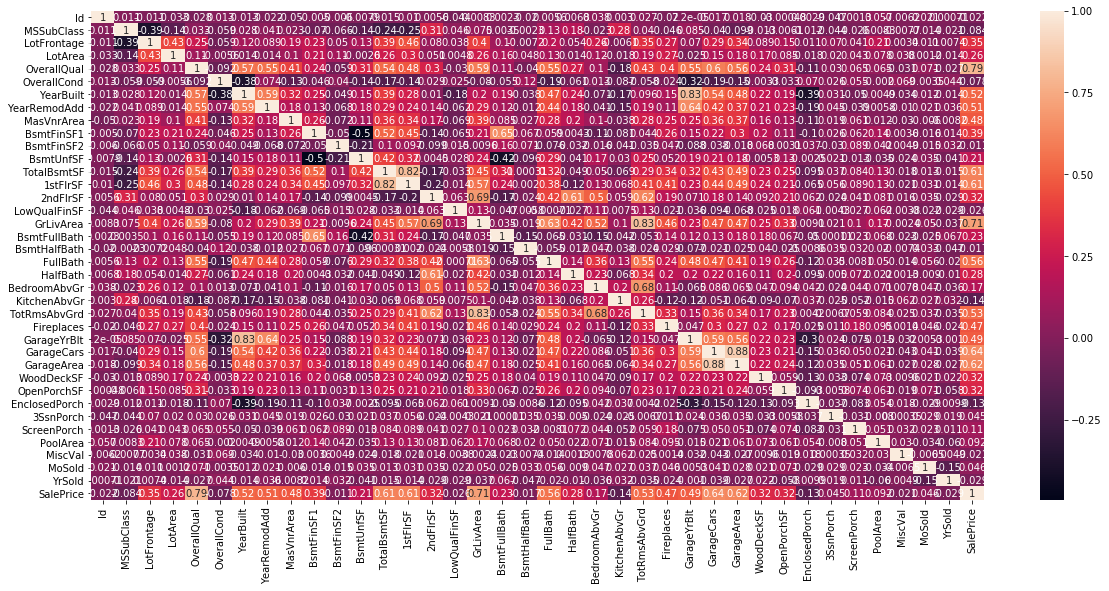

In [16]:
plt.subplots(figsize=(20,9))
corr =df_num.corr()
sns.heatmap(corr, annot=True)

Lets see top feature correlation with Target Vairable

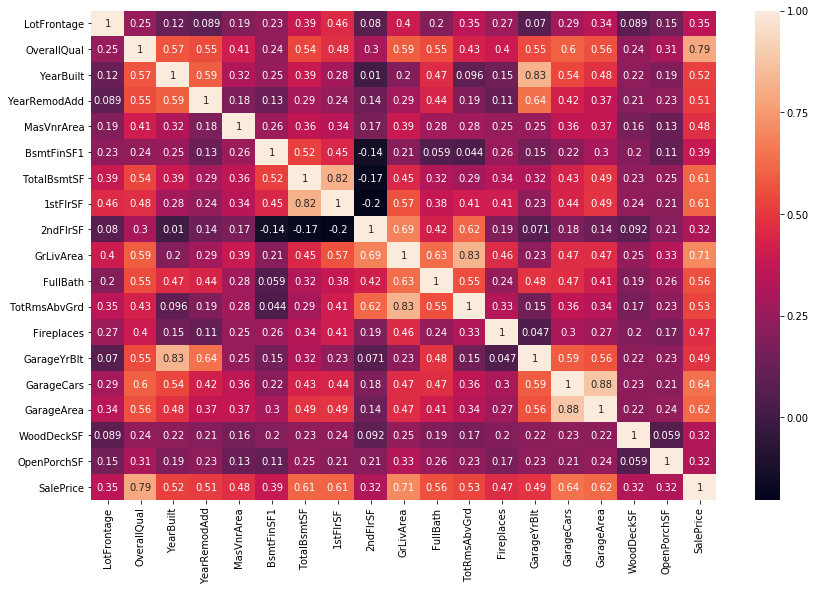

In [17]:
plt.subplots(figsize=(14,9))
sns.heatmap(df_num[(corr.index[abs(corr["SalePrice"]>0.3)])].corr(),annot=True)
plt.show()


In [18]:
print (corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-6:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64 

LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


# EDA
 1. Univariate analysis
 2. Bivariate analysis

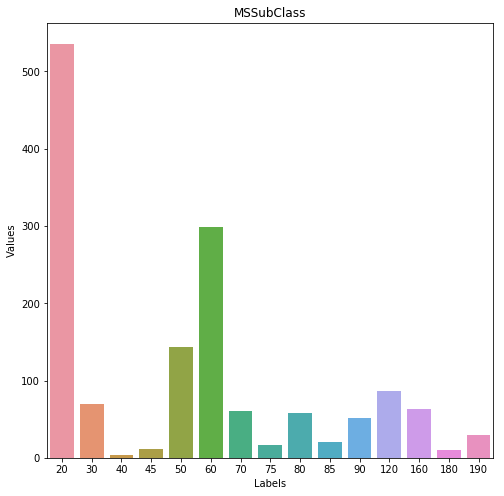

In [19]:
#MSSubClass
cnt = df["MSSubClass"].value_counts()

cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })

plt.figure(figsize=(8,8))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("MSSubClass")
plt.show()

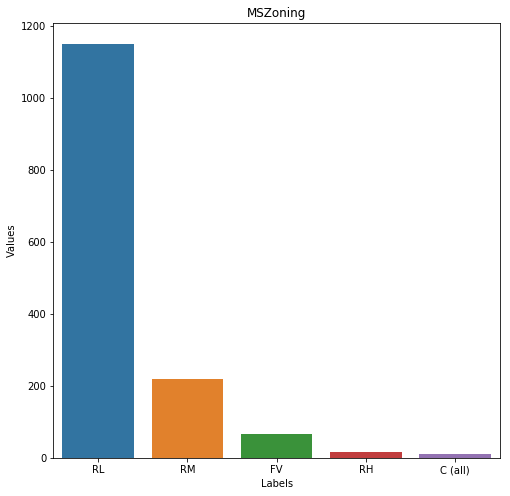

In [20]:
cnt = df["MSZoning"].value_counts()

cnt_df = pd.DataFrame({'Labels': cnt.index,
                   'Values': cnt.values
                  })

plt.figure(figsize=(8,8))
sns.barplot(x='Labels', y='Values', data=cnt_df)
plt.title("MSZoning")
plt.show()

Residential Low Density sales are pretty high 

Commercial sales are pretty low

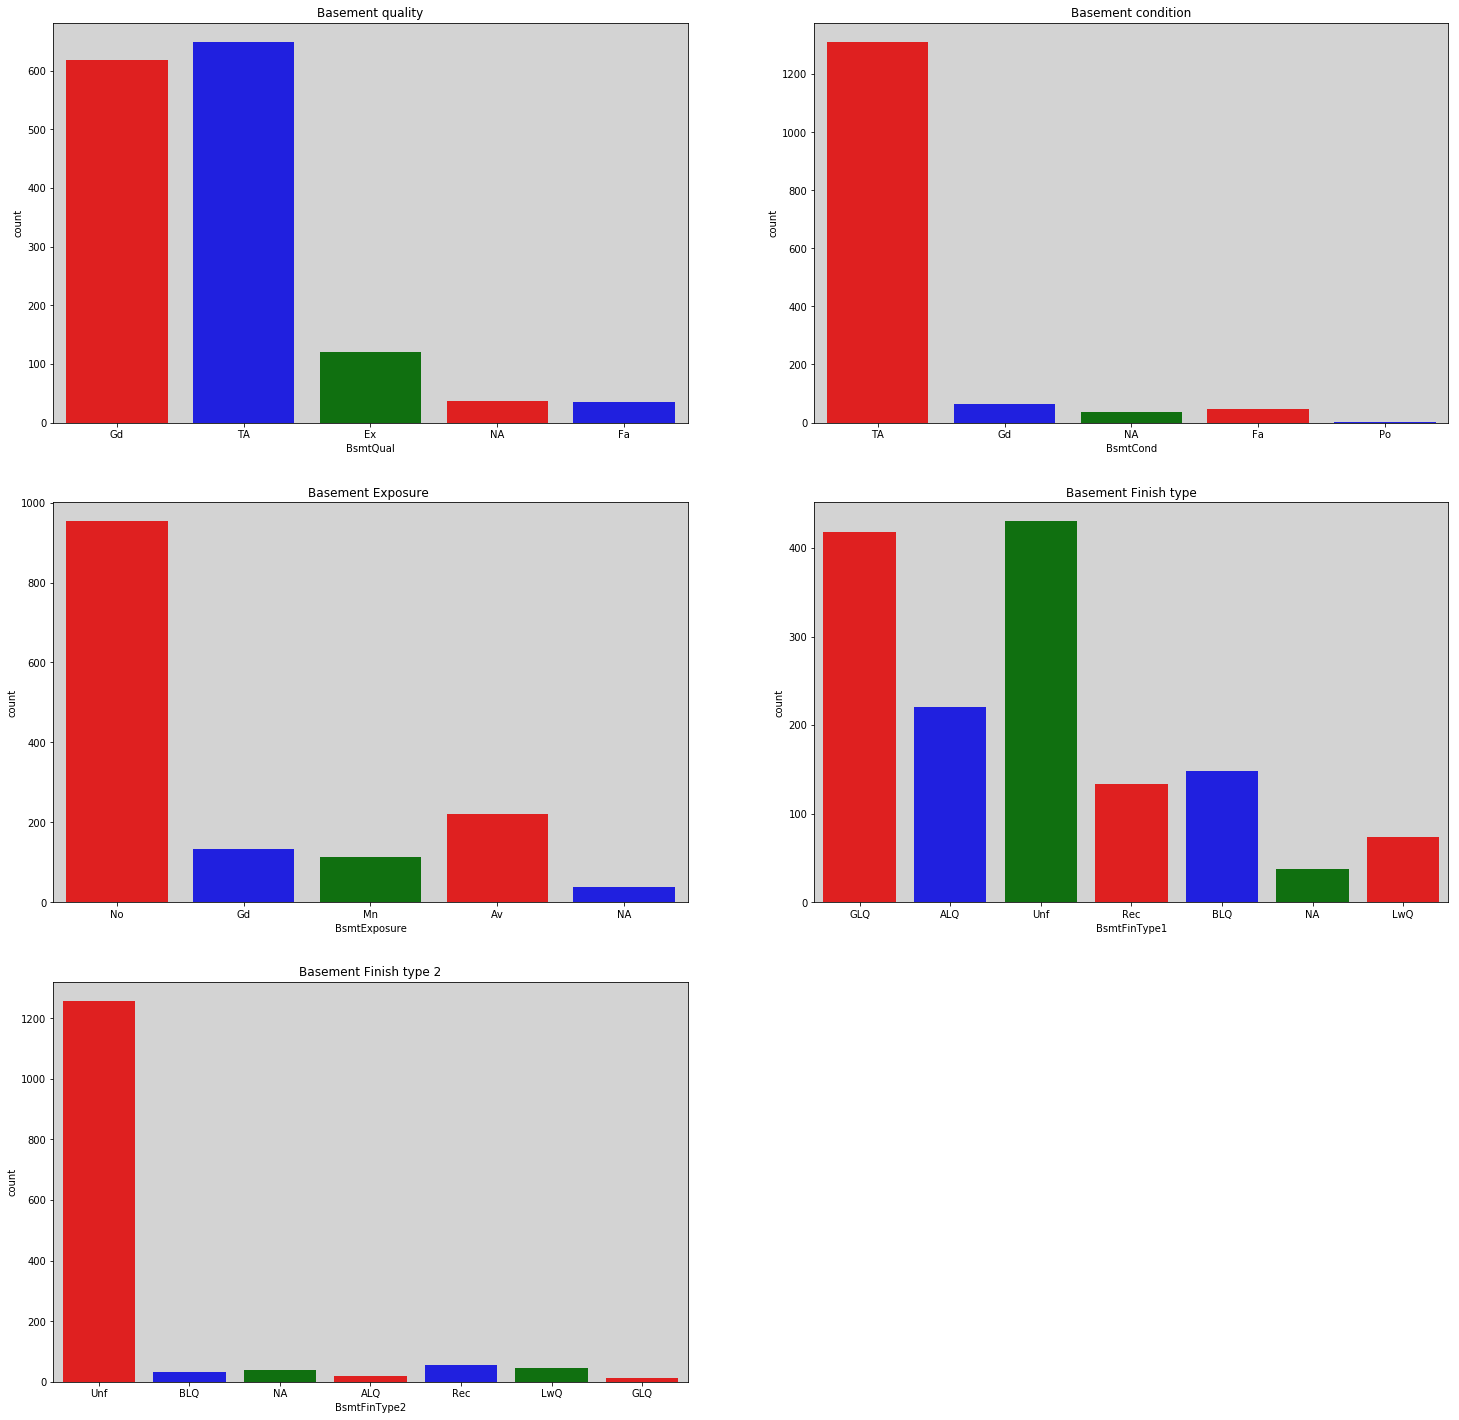

In [21]:
fig  = plt.figure(figsize=(25,25))
plt.subplot(321)
   

ax = sns.countplot("BsmtQual",data=df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Basement quality")


plt.subplot(322)

ax = sns.countplot("BsmtCond",data=df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Basement condition")

plt.subplot(323)

ax = sns.countplot("BsmtExposure",data=df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Basement Exposure ")

plt.subplot(324)

ax = sns.countplot("BsmtFinType1",data=df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Basement Finish type")

plt.subplot(325)

ax = sns.countplot("BsmtFinType2",data=df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Basement Finish type 2")


plt.show()

Basement has significance counts in most of housing so its seem very important variable 

### Bivariate analysis 

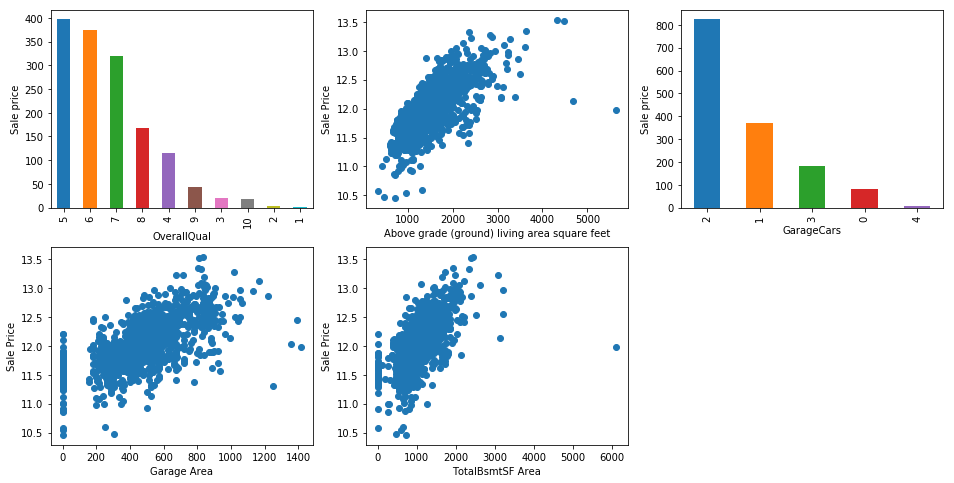

In [22]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt1 = df_num.OverallQual.value_counts().plot('bar')
plt1.set(xlabel = 'OverallQual', ylabel='Sale price')

plt.subplot(2,3,2)
plt.scatter(x=df_num['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')


plt.subplot(2,3,3)
plt1 = df_num.GarageCars.value_counts().plot('bar')
plt1.set(xlabel = 'GarageCars', ylabel='Sale price')


plt.subplot(2,3,4)
plt.scatter(x=df_num['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')


plt.subplot(2,3,5)
plt.scatter(x=df_num['TotalBsmtSF'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('TotalBsmtSF Area')

plt.show()

1. Higher the overall quality , sales price increases as well
2. Increase the living areas correspond to increase in the price, same for Garage Area and Basment area.
3. There are house sold which does not have any garage.

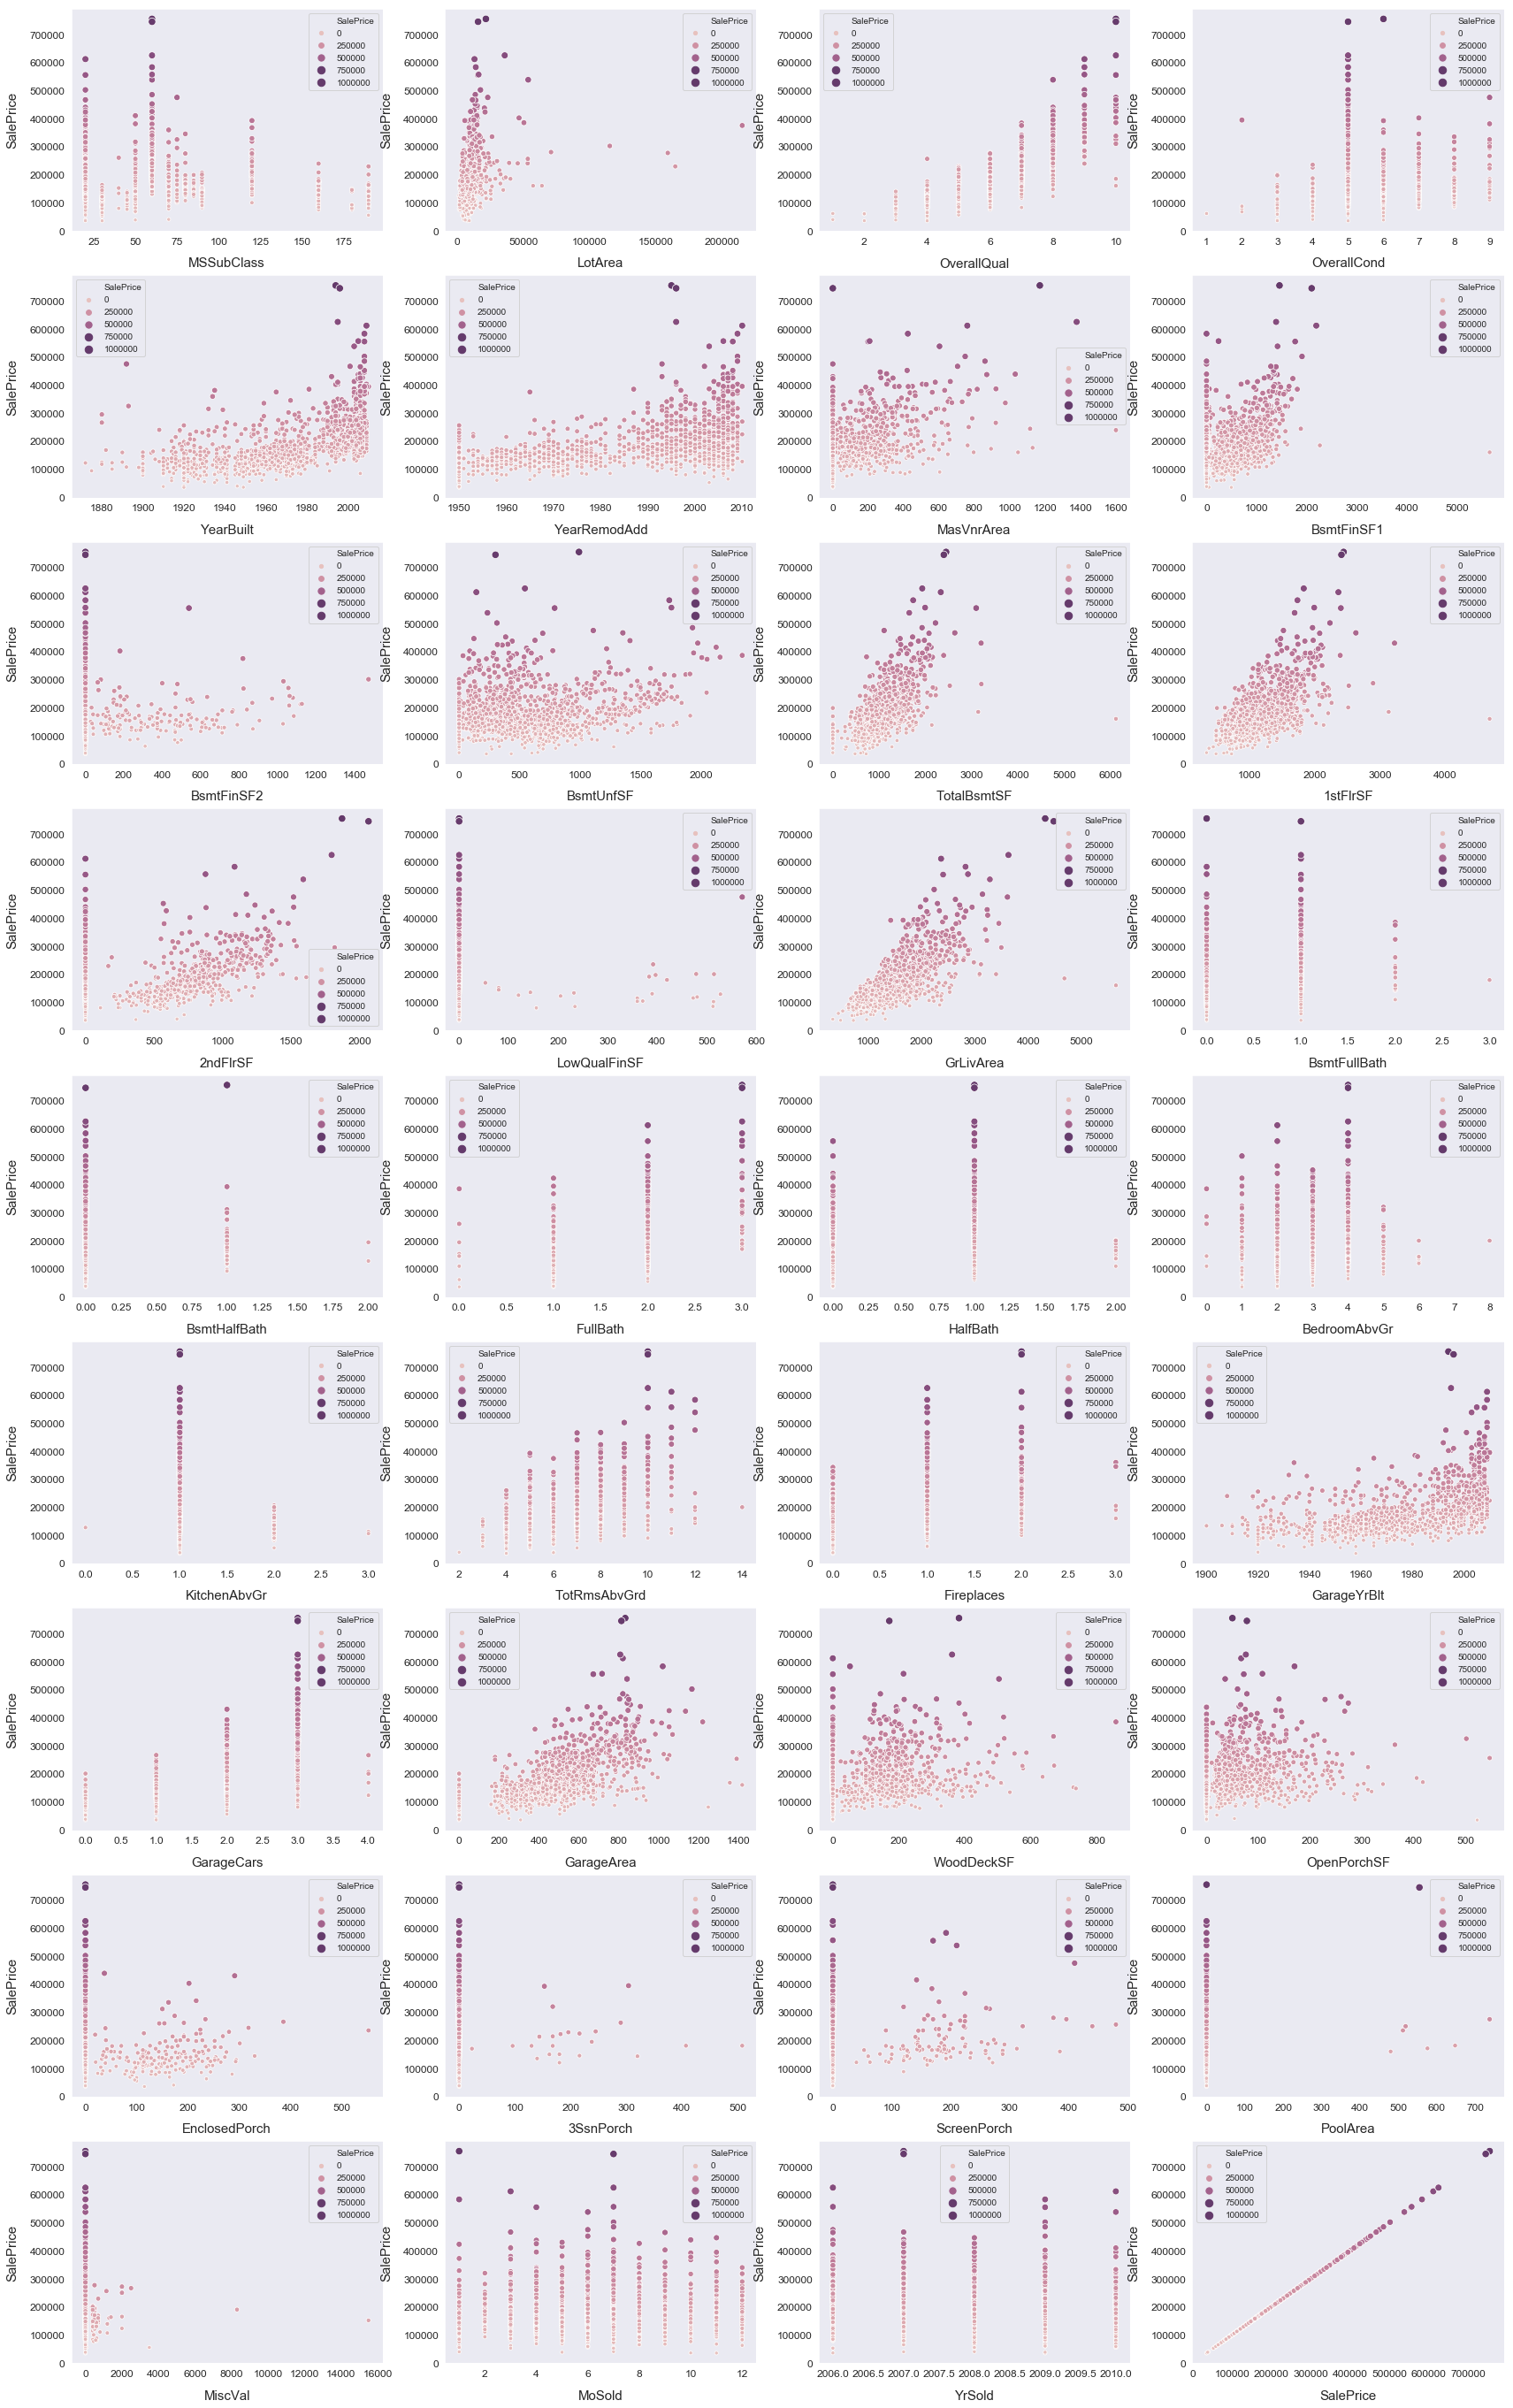

In [23]:
#Finding numeric features
sns.set_style("dark")
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics4 = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numerics4.append(i)   
        
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 80))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)

for i, feature in enumerate(list(df[numerics4]), 1):    
    plt.subplot(len(list(numerics4)), 4, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', size='SalePrice', palette=cmap, data=df)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

Distribution of target variable with other numerical feature shows its shows high variance as well as outliers.

In [24]:
#Outlier Treatmnet to retain lower and upper quantile as 0.25 & 0.99 value respectivly.
def del_outliers(x):
    list = []
    for col in df.select_dtypes(exclude=object):
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x 
df = del_outliers(df)

In [25]:
# split into X and y
y = np.log(df.SalePrice)
X = df.drop(['SalePrice'], axis=1)

In [26]:
# creating dummy variables for categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [27]:
# convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
# drop categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

# concat dummy variables with main df
X = pd.concat([X, df_dummies], axis=1)

In [29]:
df_num = X.select_dtypes(exclude=['object'])

Let's now try predicting sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Linear Model Building

In [30]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [31]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [32]:
model = lr.fit(X_train, y_train)

In [33]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8541369931696124


This means that our features explain approximately 86% of the variance in our target variable. 

In [34]:
predictions = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.020873119372841822


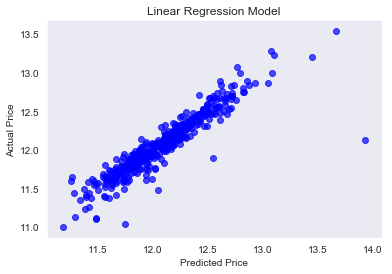

In [36]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

## Ridge Regression

In [37]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9577080097004484
0.8542307135154024


#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV

In [38]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [39]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011454,0.002791,0.001798,0.000475,0.0001,{'alpha': 0.0001},-0.084673,-0.087206,-0.075069,-0.087514,-0.088836,-0.084660,0.004978,26,-0.052315,-0.055690,-0.056119,-0.051050,-0.053769,-0.053789,0.001935
1,0.007656,0.000376,0.001476,0.000115,0.001,{'alpha': 0.001},-0.084668,-0.087163,-0.075035,-0.087436,-0.088805,-0.084621,0.004973,25,-0.052318,-0.055696,-0.056127,-0.051055,-0.053778,-0.053795,0.001936
2,0.008471,0.001081,0.001799,0.000381,0.01,{'alpha': 0.01},-0.084590,-0.086758,-0.074754,-0.086802,-0.088502,-0.084282,0.004920,24,-0.052355,-0.055759,-0.056201,-0.051147,-0.053864,-0.053865,0.001934
3,0.011713,0.003483,0.002007,0.000694,0.05,{'alpha': 0.05},-0.084050,-0.085382,-0.074049,-0.085371,-0.087469,-0.083265,0.004733,23,-0.052538,-0.056023,-0.056476,-0.051584,-0.054181,-0.054160,0.001903
4,0.009820,0.001747,0.001963,0.000167,0.1,{'alpha': 0.1},-0.083453,-0.084129,-0.073680,-0.084710,-0.086599,-0.082515,0.004537,22,-0.052767,-0.056309,-0.056745,-0.051954,-0.054482,-0.054451,0.001886


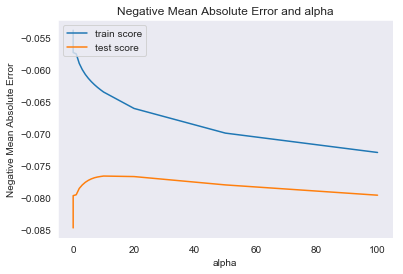

In [40]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [41]:
model_cv.best_params_

{'alpha': 10.0}

In [42]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9430129027459709
0.8729385983150083


In [43]:
ridge.coef_

array([-4.11733576e-04,  5.32025916e-06,  5.61075210e-02,  4.44406126e-02,
        1.76079048e-03,  7.63527847e-04,  2.71815334e-05,  6.79710945e-05,
        6.17968099e-05, -1.96182893e-05,  1.10149616e-04,  1.25182959e-04,
        1.23355520e-04, -1.24020915e-04,  1.24517571e-04,  1.27201801e-02,
        1.75733055e-03,  2.17798354e-02,  2.04011456e-02, -4.76427042e-03,
       -2.71305488e-02,  4.40435599e-03,  2.25766986e-02, -9.41280112e-05,
        2.98015924e-02,  6.28945663e-05,  6.88374698e-05,  1.32085377e-04,
        2.06002295e-04,  2.51536998e-04,  2.33556306e-04,  0.00000000e+00,
       -4.85431206e-05, -5.61833027e-04, -2.25561086e-03,  4.38629269e-02,
        4.04628977e-02,  6.09720670e-02,  1.73543948e-02,  4.41083196e-02,
        3.24974852e-03, -7.12342645e-05,  8.26228888e-03,  1.86549297e-02,
       -3.10909368e-02,  1.61556041e-03, -8.79828667e-03,  6.83212830e-03,
       -4.32326370e-02, -1.44149981e-02, -1.69164219e-02,  2.95238364e-02,
       -3.87353067e-02, -

# Lasso

In [44]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9294982186324081
0.8685724597520599


In [45]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', 6.212),
 ('LotArea', -0.0),
 ('OverallQual', 0.0),
 ('OverallCond', 0.066),
 ('YearBuilt', 0.047),
 ('YearRemodAdd', 0.002),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.004),
 ('FullBath', -0.0),
 ('HalfBath', 0.003),
 ('BedroomAbvGr', 0.002),
 ('KitchenAbvGr', -0.004),
 ('TotRmsAbvGrd', -0.012),
 ('Fireplaces', 0.001),
 ('GarageYrBlt', 0.024),
 ('GarageCars', 0.0),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', -0.001),
 ('MSZoning_RH', 0.006),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', 0.058),
 ('Street_Pave', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('Land

In [46]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [47]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154003,0.022829,0.001698,0.000353,0.0001,{'alpha': 0.0001},-0.081220,-0.077483,-0.071701,-0.080916,-0.083206,-0.078908,0.004044,2,-0.056205,-0.057973,-0.059202,-0.054534,-0.057181,-0.057019,0.001584
1,0.032048,0.010883,0.002003,0.000361,0.0010,{'alpha': 0.001},-0.086181,-0.071462,-0.071209,-0.080595,-0.083493,-0.078596,0.006182,1,-0.067235,-0.071501,-0.072078,-0.068616,-0.070318,-0.069950,0.001801
2,0.009852,0.001514,0.001597,0.000164,0.0100,{'alpha': 0.01},-0.095922,-0.086943,-0.075831,-0.089987,-0.092420,-0.088229,0.006859,3,-0.082916,-0.085423,-0.087213,-0.084792,-0.084951,-0.085059,0.001375
3,0.138553,0.048387,0.001768,0.000280,0.0500,{'alpha': 0.05},-0.106116,-0.103048,-0.087298,-0.108096,-0.104989,-0.101914,0.007484,4,-0.097111,-0.099378,-0.101804,-0.099215,-0.098505,-0.099203,0.001527
4,0.100481,0.033351,0.001700,0.000216,0.1000,{'alpha': 0.1},-0.110741,-0.107575,-0.093152,-0.111637,-0.109391,-0.106504,0.006810,5,-0.102894,-0.104624,-0.106323,-0.102854,-0.103370,-0.104013,0.001321


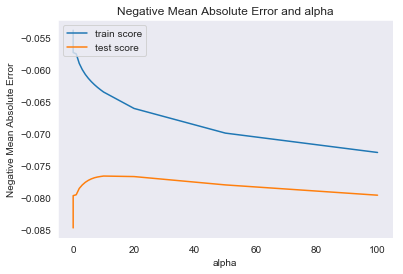

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [49]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [50]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9294982186324081
0.8685724597520599


In [51]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [52]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,6.211773
226,SaleType_Oth,0.114152
59,Neighborhood_Edwards,0.106949
3,OverallCond,0.065919
74,Neighborhood_StoneBr,0.060176
38,MSZoning_RM,0.057698
232,SaleCondition_Partial,0.057042
203,GarageType_Attchd,0.048402
4,YearBuilt,0.047052
152,Foundation_Slab,0.046441


In [53]:
lasso.coef_

array([-2.98739560e-04,  5.22484559e-06,  6.59189484e-02,  4.70518518e-02,
        2.16040557e-03,  8.40825688e-04,  3.55564725e-05,  1.52867220e-04,
        1.16408009e-04,  4.55969220e-05,  3.52986976e-05,  2.28057602e-04,
        2.26097436e-04,  3.50472907e-05,  4.31711860e-05,  3.88366676e-03,
       -0.00000000e+00,  3.21367414e-03,  2.30488738e-03, -4.17146781e-03,
       -1.15618350e-02,  6.69982505e-04,  2.35163894e-02,  1.11290528e-04,
        2.92527520e-02,  6.73324075e-05,  6.99820003e-05,  1.78282137e-04,
        2.24855859e-04,  2.17858622e-04,  2.63227435e-04,  0.00000000e+00,
       -5.76572825e-05, -1.16933018e-04, -9.65047922e-04,  5.76543362e-03,
        0.00000000e+00,  5.76975442e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -8.47385425e-03, -0.00000000e+00, -3.30056969e-03,  0.00000000e+00,
       -0.00000000e+00, -

In [54]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9294982186324081
0.8685724597520599


In [55]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 70 variables and eliminated the other 163 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

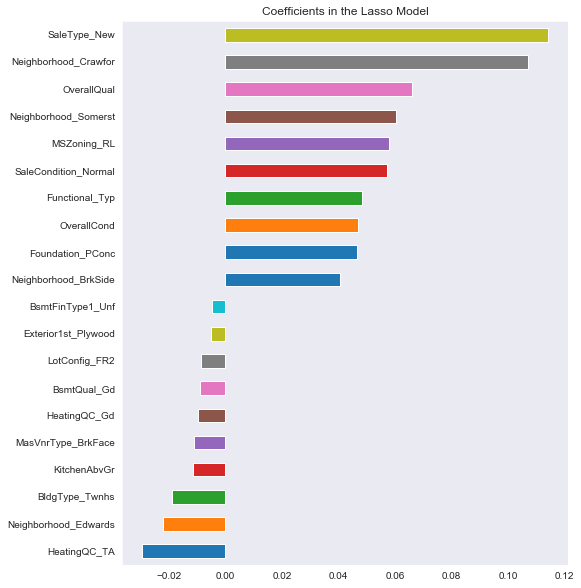

In [56]:
# plotting feature importances!
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#### Best alpha value for Lasso : {'alpha': 0.001}
#### Best alpha value for Ridge : {'alpha': 10}